# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [12]:
# Sua análise da parte 1 começa aqui.

dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


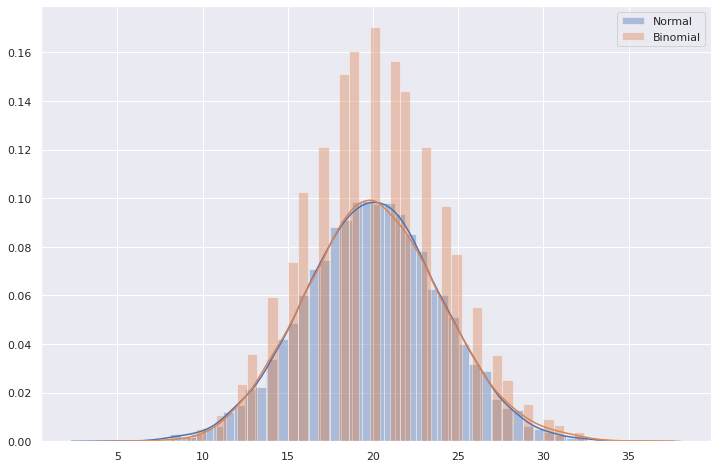

In [13]:
sns.distplot(dataframe.normal, label="Normal")
sns.distplot(dataframe.binomial, label="Binomial")
plt.xlabel("")
plt.legend();

In [11]:
dataframe['normal'].quantile((0.25, 0.5, 0.75))

0.25    17.309638
0.50    19.989620
0.75    22.684324
Name: normal, dtype: float64

In [14]:
dataframe['binomial'].quantile((0.25, 0.5, 0.75))

0.25    17.0
0.50    20.0
0.75    23.0
Name: binomial, dtype: float64

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [30]:
df = dataframe.quantile((0.25,0.5,0.75))
df['resultado'] = (df['normal'] - df['binomial'])
res = tuple(df['resultado'].round(3))
res 

(0.31, -0.01, -0.316)

In [32]:
def q1():
    q1_norm, q2_norm, q3_norm = dataframe.normal.quantile([0.25,0.5,0.75])
    q1_binom, q2_binom, q3_binom = dataframe.binomial.quantile([0.25,0.5,0.75])
    res = (round(q1_norm - q1_binom,3), round(q2_norm - q2_binom,3), round(q3_norm - q3_binom,3))
    return res

In [31]:
df.head()

,normal,binomial,resultado
0.25,17.309638,17.0,0.309638
0.50,19.989620,20.0,-0.010380
0.75,22.684324,23.0,-0.315676


Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

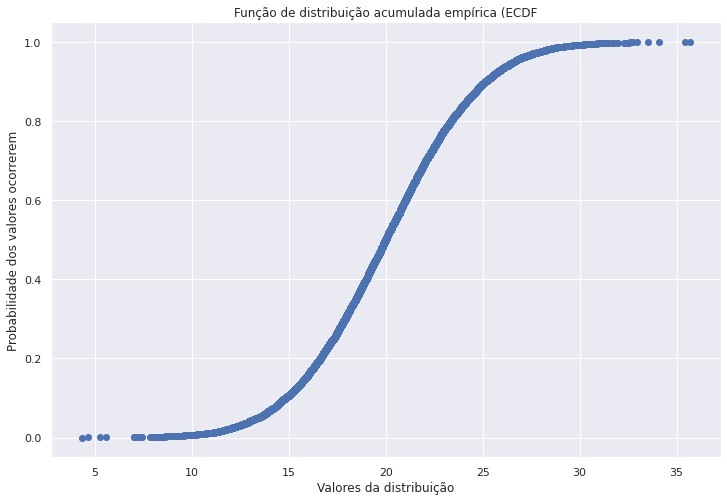

In [46]:

# Plotando o  ECDF dos dados da variável normal:
ecdf = ECDF(dataframe.normal)
plt.title('Função de distribuição acumulada empírica (ECDF')
plt.xlabel('Valores da distribuição')
plt.ylabel('Probabilidade dos valores ocorrerem')
plt.scatter(ecdf.x, ecdf.y);

In [33]:
def q2():
    # Retorne aqui o resultado da questão 2.
    ecdf = ECDF(dataframe.normal)
    # quero area acumulada da superior menos a área da inferior: ecdf(sup) - ecdf(inf)
    media = dataframe.normal.mean() 
    desvio = dataframe.normal.std()
    prob = ecdf(media+desvio) - ecdf(media-desvio)
    return float(prob.round(3))

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [50]:
def q3():
  m_norm = dataframe['normal'].mean()
  m_binom = dataframe['binomial'].mean()

  v_norm = dataframe['normal'].var()
  v_binom = dataframe['binomial'].var()

  return tuple([round(x,3) for x in (m_binom - m_norm,v_binom - v_norm)])
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

In [52]:
def binomial():
    # Garantido que o resultado gerado seja sempre o mesmo:
    np.random.seed(42)

    # Aumentando o n da distribuição binomial:
    binomial_2 = sct.binom.rvs(100, 0.2, size=100000)

    # Média e variância da distribuição normal:
    m_norm, v_norm = dataframe.normal.mean(),dataframe.normal.var()

    # Média e variância da distribuição binomial:
    m_binom, v_binom = binomial_2.mean(),binomial_2.var()
    # Diferença entre as médias e as variâncias das variáveis binomial e normal:
    return tuple([round(x,3) for x in (m_binom - m_norm,v_binom - v_norm)])

binomial()

(-0.003, -0.196)

É possível perceber que, aumentando-se o n da distribuição Binomial, de 10.000 para 100.000, ela se aproxima mais da distribuição normal, diminuindo-se as diferenças.

## Parte 2

### _Setup_ da parte 2

In [54]:
stars = pd.read_csv("https://raw.githubusercontent.com/karinnecristina/AceleraDev_Codenation/master/Desafio_3/pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [58]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

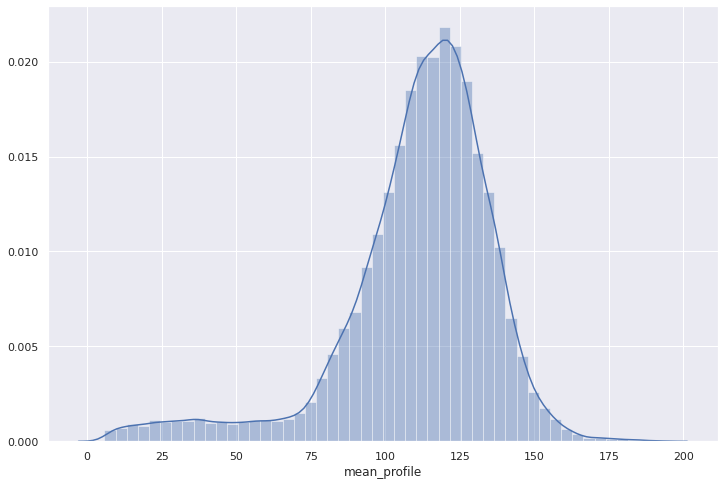

In [88]:
sns.distplot(stars['mean_profile']);

In [ ]:
#Filtrando as variaveis
filtro = stars[['mean_profile', 'target']]
filtro = filtro.query('target == False')

#Padronizando a variavel mean_profile

false_pulsar_mean_profile_standardized= (filtro - filtro.mean() / filtro.std())
false_pulsar_mean_profile_standardized

In [91]:
#quantis teoricos
Q_80 = sct.norm.ppf(0.80, loc=0, scale=1)
Q_90 = sct.norm.ppf(0.90, loc=0, scale=1)
Q_95 = sct.norm.ppf(0.95, loc=0, scale=1)

In [106]:
def q4():
    # Filtrando os valores:
    filter_stars = stars.loc[stars['target'] == False]['mean_profile']

    # Padronizando:
    false_pulsar_mean_profile_standardized = sct.zscore(filter_stars)

    # Quantis teóricos:
    ppf = sct.norm.ppf([.8, .9, .95])

    # CDF empírica da variável:
    ecdf = ECDF(false_pulsar_mean_profile_standardized)

    return tuple([round(x,3) for x in ecdf([ppf[0],ppf[1],ppf[2]])])
q4()


(0.806, 0.911, 0.959)

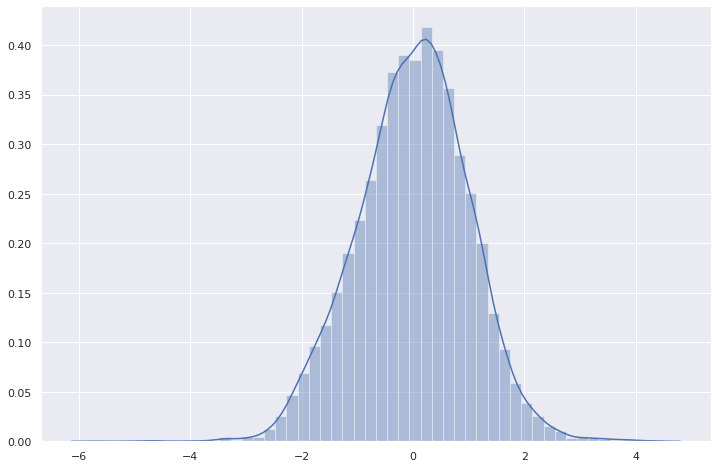

In [107]:
# Analisando a variável 'mean_profile' depois da padronização:

filter_stars = stars.loc[stars['target'] == False]['mean_profile'] # Filtrando os valores
false_pulsar_mean_profile_standardized = sct.zscore(filter_stars) # Padronizando

sns.distplot(false_pulsar_mean_profile_standardized);

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

Pelo gráfico já deu para perceber que a variável padronizado tem distribuição próxima à normal, logo, faz sentido os valores encontrados serem semelhantes aos valores originais de 80%, 90% e 95%.

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [113]:
def q5():
    #filtrando e padronizando
    filtro = stars[stars['target'] == 0]['mean_profile']
    padronizado = (filtro - filtro.mean()) / filtro.std()
    #os quartis da false_pulsar:
    Q1, Q2, Q3 = padronizado.quantile([0.25,0.5,0.75])
    #os quartis da normal:
    Norm_Q1 = sct.norm.ppf(0.25, loc=0, scale=1)
    Norm_Q2 = sct.norm.ppf(0.50, loc=0, scale=1)
    Norm_Q3 = sct.norm.ppf(0.75, loc=0, scale=1)
    return (round(Q1-Norm_Q1,3),round(Q2-Norm_Q2,3),round(Q3-Norm_Q3,3))

q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.